In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix



In [23]:
train_dir = "../../Datasets/DogandCat/PetImages"

## Data Augmentaion and Preprocessing


In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


In [32]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),  # Reduced from 512 to 128
    Dropout(0.4),  # Increased dropout
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

model.summary()

e:\ml\AI models\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
547/624 ━━━━━━━━━━━━━━━━━━━━ 1:19 1s/step - accuracy: 0.6152 - loss: 0.8440

e:\ml\AI models\venv\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.6209 - loss: 0.8197 - val_accuracy: 0.7009 - val_loss: 0.5747
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 0.7347 - loss: 0.5367 - val_accuracy: 0.6926 - val_loss: 0.5723
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.7679 - loss: 0.4896 - val_accuracy: 0.7798 - val_loss: 0.4636
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 659s 1s/step - accuracy: 0.7970 - loss: 0.4367 - val_accuracy: 0.8245 - val_loss: 0.3931
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 828s 1s/step - accuracy: 0.8244 - loss: 0.4082 - val_accuracy: 0.8145 - val_loss: 0.4059
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 976s 2s/step - accuracy: 0.8429 - loss: 0.3662 - val_accuracy: 0.8533 - val_loss: 0.3507
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 804s 1s/step - accuracy: 0.8590 - loss: 0.3379 - val_accuracy: 0.8646 - val_loss: 0.3246
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 616s 987ms/step - accuracy: 0.8661 - loss: 0.3142 - val_accuracy: 0.

In [34]:
model.save("dog_vs_cat_cnn.h5")


In [35]:
val_preds = model.predict(val_generator)
y_true = val_generator.classes
y_pred = (val_preds > 0.5).astype(int).flatten()


156/156 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step


              precision    recall  f1-score   support

         Cat       0.51      0.62      0.56      2498
         Dog       0.51      0.40      0.45      2493

    accuracy                           0.51      4991
   macro avg       0.51      0.51      0.51      4991
weighted avg       0.51      0.51      0.51      4991



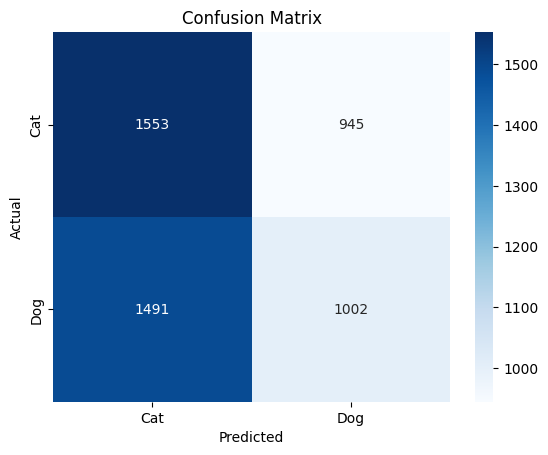

In [36]:
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()